In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_copy = pd.read_csv('covid_dataset.csv')
data_copy['Day'] = pd.to_datetime(data_copy['Day'])
data_copy.set_index('Day', inplace=True, drop=True)
 
data_fd = pd.read_csv('covid_first_dose.csv')
data_fd['Day'] = pd.to_datetime(data_fd['Day'])
data_fd.set_index('Day', inplace=True, drop=True)

data_sd = pd.read_csv('covid_second_dose.csv')
data_sd['Day'] = pd.to_datetime(data_sd['Day'])
data_sd.set_index('Day', inplace=True, drop=True)
 
data =  pd.concat([data_copy, data_fd, data_sd], axis=1, ignore_index=True)
data.rename(columns = {0:"Lab_Test",1:"Confirmed_case",2:"Death_Case",3:"First_Dose",4:"Second_Dose",}, inplace = True)

print(data.tail(20))
cnt = 0


            Lab_Test  Confirmed_case  Death_Case  First_Dose  Second_Dose
Day                                                                      
2021-12-01     18851             282           2    998927.0     305262.0
2021-12-02     21057             261           3   1038056.0     299495.0
2021-12-03     17387             243           3      1899.0       1899.0
2021-12-04     16428             176           6    642635.0     263673.0
2021-12-05     19132             197           6    666819.0     309062.0
2021-12-06     19237             277           4    225731.0     358964.0
2021-12-07     20014             291           5    311518.0    1161519.0
2021-12-08     20549             277           6    348297.0    1085963.0
2021-12-09     21496             262           0    320380.0    1312423.0
2021-12-10     20052             269           1         NaN          NaN
2021-12-11     15632             177           5    227487.0     709368.0
2021-12-12     21612             329  

In [ ]:
data.isnull().sum()

Lab_Test            0
Confirmed_case      0
Death_Case          0
First_Dose        387
Second_Dose       417
dtype: int64

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.isnull().sum())

0
Lab_Test          0
Confirmed_case    0
Death_Case        0
First_Dose        0
Second_Dose       0
dtype: int64


In [ ]:
if cnt == 0:
    sum1 = 0
    sum2 = 0
    for i in range(data.shape[0]):
        sum1 += data.iloc[i,3]
        data.iloc[i,3] = sum1
        
        sum2 += data.iloc[i,4]
        data.iloc[i,4] = sum2
    
    cnt += 1


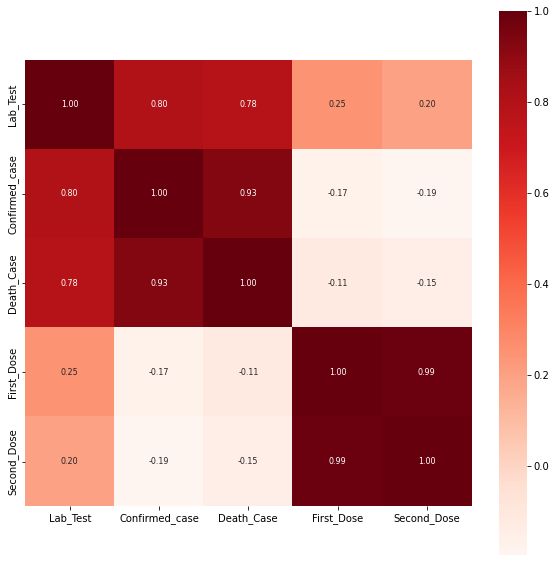

In [ ]:
corr = data.corr() 

#corelation analysis
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8}, cmap='Reds')

In [ ]:
df2 =  data.copy()
print(df2.head())
X_Death = df2.drop(columns = ['Death_Case', 'First_Dose', 'Second_Dose'])
Y_Death =  np.array(df2[['Death_Case']])

X_Confirmed = df2.drop(columns = ['Confirmed_case','Death_Case'])
Y_Confirmed =  np.array(df2[['Confirmed_case']])

df2["Lab_Test"] = df2["Lab_Test"].rolling(window=14, min_periods=1).mean()
df2["Lab_Test"] = df2["Lab_Test"].round(decimals = 0)

df2["Confirmed_case"] = df2["Confirmed_case"].rolling(window=14, min_periods=1).mean()
df2["Confirmed_case"] = df2["Confirmed_case"].round(decimals = 0)

df2["Death_Case"] = df2["Death_Case"].rolling(window=14, min_periods=1).mean()
df2["Death_Case"] = df2["Death_Case"].round(decimals = 0)

df2['First_Dose'] = df2['First_Dose'].rolling(window=14, min_periods=1).mean()
df2['First_Dose'] = df2['First_Dose'].round(decimals = 0)
 
df2['Second_Dose'] = df2['Second_Dose'].rolling(window=14, min_periods=1).mean()
df2['Second_Dose'] = df2['Second_Dose'].round(decimals = 0)

X_Death_2 = df2.drop(columns = ['Death_Case', 'First_Dose', 'Second_Dose'])
Y_Death_2 =  np.array(df2[['Death_Case']])

X_Confirmed_2 = df2.drop(columns = ['Confirmed_case','Death_Case'])
Y_Confirmed_2 =  np.array(df2[['Confirmed_case']])

            Lab_Test  Confirmed_case  Death_Case  First_Dose  Second_Dose
Day                                                                      
2020-04-04       434               9           2         0.0          0.0
2020-04-05       367              18           1         0.0          0.0
2020-04-06       468              35           3         0.0          0.0
2020-04-07       679              41           5         0.0          0.0
2020-04-08       981              54           3         0.0          0.0


In [ ]:
def evaluate_model(y, y_predict, flg):
    if flg == 1:
        print('MAE: ', metrics.mean_absolute_error(y, y_predict))
        print('MSE: ', metrics.mean_squared_error(y, y_predict))
        print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y, y_predict)))
        print('R-squared: ', metrics.r2_score(y, y_predict))
        print()
    elif flg == 2:
        print("Confusion Matrix: ")
        print(confusion_matrix(y, y_predict))
        plt.figure(figsize=(10,7))
        sns.heatmap(confusion_matrix(y, y_predict), annot=True)
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        
        print("Accuracy Score:  ",accuracy_score(y, y_predict))
        print('Precision Score: ', precision_score(y, y_predict, average=None))
        print('Recall Score:    ', recall_score(y, y_predict, average=None))
        print()
    elif flg == 3:
        RMSE = np.sqrt(metrics.mean_absolute_error(y, y_predict))
        R_squared = metrics.r2_score(y, y_predict)
        return RMSE, R_squared
    else:
        print("Invalid Flg value!")

def plot_model(x, y, x_test, y_test, model_1, model_2 = None, degree=1):
    X_seq = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X_seq, model_1.predict(X_seq), color = "black")
    
    RMSE_train, R_squared_train = evaluate_model(y, model_1.predict(x), 3)
    RMSE_test, R_squared_test = evaluate_model(y_test, model_1.predict(x_test), 3)
    
    plt.text(38100, 90, f'Degree = {degree}', fontsize = 8)
    
    plt.text(38100, 65, 'For train data: ', fontsize = 8)
    plt.text(38100, 52, f'RMSE = {round(RMSE_train,2)}', fontsize = 8)
    plt.text(38100, 38, f'R_squared = {round(R_squared_train,2)}', fontsize = 8)
    
    plt.text(38100, 15, 'For test data: ', fontsize = 8)
    plt.text(38100, 2, f'RMSE = {round(RMSE_test,2)}', fontsize = 8)
    plt.text(38100, -10, f'R_squared = {round(R_squared_test,2)}', fontsize = 8)
    
    if model_2 != None:
        plt.plot(X_seq, model_2.predict(X_seq), color = "red")

def plot_model_2(df, x, y, x_test, y_test, model_1, model_2 = None, degree=1):
    x_sec = np.linspace(x.min(), x.max(), 1000)
    
    plt.figure()
    ax1 = df.plot(kind='scatter', x='Lab_Test', y='Confirmed_case', color='r') 
    ax2 = df.plot(kind='scatter', x='First_Dose', y='Confirmed_case', color='g', ax=ax1)
    ax2 = df.plot(kind='scatter', x='Second_Dose', y='Confirmed_case', color='orange', ax=ax1)
    plt.plot(x_sec, model_1.predict(x_sec), color = "black")
    
    RMSE_train, R_squared_train = evaluate_model(y, model_1.predict(x), 3)
    RMSE_test, R_squared_test = evaluate_model(y_test, model_1.predict(x_test), 3)
    
    plt.text(38100, 90, f'Degree = {degree}', fontsize = 8)
    
    plt.text(38100, 65, 'For train data: ', fontsize = 8)
    plt.text(38100, 52, f'RMSE = {round(RMSE_train,2)}', fontsize = 8)
    plt.text(38100, 38, f'R_squared = {round(R_squared_train,2)}', fontsize = 8)
    
    plt.text(38100, 15, 'For test data: ', fontsize = 8)
    plt.text(38100, 2, f'RMSE = {round(RMSE_test,2)}', fontsize = 8)
    plt.text(38100, -10, f'R_squared = {round(R_squared_test,2)}', fontsize = 8)
    
    plt.ylim(0, 15000)
    if model_2 != None:
        plt.plot(x_sec, model_2.predict(x_sec), color = "blue")

def plot_model_3(df, x, y, x_test, y_test, model_1, model_2 = None, degree=1):
    x_sec = np.linspace(x.min(), x.max(), 1000)
    
    plt.figure()
    ax1 = df.plot(kind='scatter', x='Lab_Test', y='Death_Case', color='r') 
    ax2 = df.plot(kind='scatter', x='Confirmed_case', y='Death_Case', color='g', ax=ax1)
    plt.plot(x_sec, model_1.predict(x_sec), color = "black")
    
    RMSE_train, R_squared_train = evaluate_model(y, model_1.predict(x), 3)
    RMSE_test, R_squared_test = evaluate_model(y_test, model_1.predict(x_test), 3)
    
    plt.text(38100, 90, f'Degree = {degree}', fontsize = 8)
    
    plt.text(38100, 65, 'For train data: ', fontsize = 8)
    plt.text(38100, 52, f'RMSE = {round(RMSE_train,2)}', fontsize = 8)
    plt.text(38100, 38, f'R_squared = {round(R_squared_train,2)}', fontsize = 8)
    
    plt.text(38100, 15, 'For test data: ', fontsize = 8)
    plt.text(38100, 2, f'RMSE = {round(RMSE_test,2)}', fontsize = 8)
    plt.text(38100, -10, f'R_squared = {round(R_squared_test,2)}', fontsize = 8)
    
    if model_2 != None:
        plt.plot(x_sec, model_2.predict(x_sec), color = "blue")
        
        
def OLS(X, Y):
    X = sm.add_constant(X)
    ols_model = sm.OLS(Y,X)
    results = ols_model.fit()
    print(results.summary())
    

def Linear_Regression(df, X, Y, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, Y_train)
    Y_pred_train = linear_regression.predict(X_train)
    Y_pred_test = linear_regression.predict(X_test)
    
    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, linear_regression)
        else:
            plot_model_3(df, X_train, Y_train, X_test, Y_test, linear_regression)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, linear_regression)
        else:
            plot_model_2(df, X_train, Y_train, X_test, Y_test, linear_regression)
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train, 1)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test, 1)
    return linear_regression
    
def Polynomial_Regression(df, X, Y, degree=2, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    polynomial_regression = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_regression.fit(X_train, Y_train)
    Y_pred_train = polynomial_regression.predict(X_train)
    Y_pred_test = polynomial_regression.predict(X_test)
    
    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, polynomial_regression, degree=degree)
        else:
            plot_model_3(df, X_train, Y_train, X_test, Y_test, polynomial_regression, degree=degree)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, polynomial_regression, degree=degree)
        else:
            plot_model_2(df, X_train, Y_train, X_test, Y_test, polynomial_regression, degree=degree)
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train, 1)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test, 1)
    return polynomial_regression

def Polynomial_Regression_L1(df, X, Y, degree=2, alpha = 0.5, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    polynomial_regression_L1 = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    polynomial_regression_L1.fit(X_train, Y_train)
    Y_pred_train = polynomial_regression_L1.predict(X_train)
    Y_pred_test = polynomial_regression_L1.predict(X_test)
    
    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, polynomial_regression_L1, degree=degree)
        else:
            plot_model_3(df, X_train, Y_train, X_test, Y_test, polynomial_regression_L1, degree=degree)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, polynomial_regression_L1, degree=degree)
        else:
            plot_model_2(df, X_train, Y_train, X_test, Y_test, polynomial_regression_L1, degree=degree)
    
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train, 1)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test, 1)
    return polynomial_regression_L1
    
def Polynomial_Regression_L2(df, X, Y, degree=2, alpha = 0.5, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    polynomial_regression_L2 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    polynomial_regression_L2.fit(X_train, Y_train)
    Y_pred_train = polynomial_regression_L2.predict(X_train)
    Y_pred_test = polynomial_regression_L2.predict(X_test)
    

    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, polynomial_regression_L2, degree=degree)
        else:
            plot_model_3(df, X_train, Y_train, X_test, Y_test, polynomial_regression_L2, degree=degree)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, polynomial_regression_L2, degree=degree)
        else:
            plot_model_2(df, X_train, Y_train, X_test, Y_test, polynomial_regression_L2, degree=degree)
        
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train, 1)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test, 1)
    return polynomial_regression_L2

def Lasso_Regression(df, X, Y, alpha = 0.5, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, Y_train)
    Y_pred_train = lasso.predict(X_train)
    Y_pred_test = lasso.predict(X_test)
    
    
    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, lasso)
        else:
            plot_model_3(df, X_train, Y_train, X_test, Y_test, lasso)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, lasso)
        else:
            plot_model_2(df, X_train, Y_train, X_test, Y_test, lasso)
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train, 1)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test, 1)
    return lasso

def Ridge_Regression(df, X, Y, alpha = 0.5, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, Y_train)
    Y_pred_train = ridge.predict(X_train)
    Y_pred_test = ridge.predict(X_test)
    

    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, ridge)
        else:
            plot_model_3(df, X_train, Y_train, X_test, Y_test, ridge)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, ridge)
        else:
            plot_model_2(df, X_train, Y_train, X_test, Y_test, ridge)
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train, 1)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test, 1)
    return ridge

def ElasticNet_Regression(df, X, Y, alpha = 0.5, l1_ratio = 0.5, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    elasticNet = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
    elasticNet.fit(X_train, Y_train)
    Y_pred_train = elasticNet.predict(X_train)
    Y_pred_test = elasticNet.predict(X_test)
    
    
    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, elasticNet)
        else:
            plot_model_3(df, X_train, Y_train, X_test, Y_test, elasticNet)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, X_test, Y_test, elasticNet)
        else:
            plot_model_2(df, X_train, Y_train, X_test, Y_test, elasticNet)
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train, 1)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test, 1)
    return elasticNet

def Linear_VS_Polynomial_Regression(df, X, Y, degree=2, ratio = 0.2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    
    linear_regression = Linear_Regression(df, X,Y)
    polynomial_regression = Polynomial_Regression(df, X,Y, degree=degree)
    
    if flg == 0:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, linear_regression, polynomial_regression)
        else:
            plot_model_3(df, X_train, Y_train, linear_regression, polynomial_regression)
    else:
        if X.shape[1] == Y.shape[1]:
            plot_model(X_train, Y_train, linear_regression, polynomial_regression)
        else:
            plot_model_2(df, X_train, Y_train, linear_regression, polynomial_regression)
    

def Logistic_Regression(X, Y, c=10, ratio = 0.2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    logistic_regression = LogisticRegression(C = c)
    logistic_regression.fit(X_train, Y_train)
    Y_pred_train = logistic_regression.predict(X_train)
    Y_pred_test = logistic_regression.predict(X_test)
    
    print("------------------------Logistic_Regression------------------------------------------------")

    
    prediction_train = list(map(round,Y_pred_train))
    prediction_test = list(map(round,Y_pred_test))
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, prediction_train, 2)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, prediction_test, 2)
    
    return logistic_regression


def SVM(X, Y, gamma='auto', ratio = 0.2, c=10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ratio, random_state = 0)
    svm_model = make_pipeline(preprocessing.StandardScaler(), SVC(kernel='linear',C=c, gamma=gamma))
    svm_model.fit(X_train, Y_train)
    
    Y_pred_train = svm_model.predict(X_train)
    Y_pred_test = svm_model.predict(X_test)
    
    
    print("------------------------SVM------------------------------------------------")

    
    prediction_train = list(map(round,Y_pred_train))
    prediction_test = list(map(round,Y_pred_test))
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, prediction_train, 2)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, prediction_test, 2)
    return svm_model



# Classification

In [ ]:
df3 = data.copy()
df3['Percentage'] = (df3['Confirmed_case'] / df3['Lab_Test'])*100
condlist = [df3['Percentage']<5, df3['Percentage']>20]
choicelist = ['Low', 'High']
df3['Risk'] = np.select(condlist, choicelist, default='Medium')

In [ ]:
df3['Risk'].value_counts()

Medium    332
High      148
Low       146
Name: Risk, dtype: int64

In [ ]:
le = preprocessing.LabelEncoder()
for feature in df3.columns:
    unique_values = df3[feature].unique()
    example_value = unique_values[0]
    if isinstance(example_value, str):
        df3[feature] = le.fit_transform(df3[feature])
        

In [ ]:
X2 = df3[['Lab_Test','Confirmed_case']]
Y2 =  np.array(df3['Risk'])

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

print(X2.shape, X_train.shape, X_test.shape)

(626, 2) (500, 2) (126, 2)


In [ ]:
pd.DataFrame(Y_test).value_counts()

2    73
0    28
1    25
dtype: int64

------------------------Logistic_Regression------------------------------------------------
For Train Dataset: 
Confusion Matrix: 
[[120   0   0]
 [  0 121   0]
 [  0   0 259]]
Accuracy Score:   1.0
Precision Score:  [1. 1. 1.]
Recall Score:     [1. 1. 1.]

For Test Dataset: 
Confusion Matrix: 
[[27  0  1]
 [ 0 24  1]
 [ 0  0 73]]
Accuracy Score:   0.9841269841269841
Precision Score:  [1.         1.         0.97333333]
Recall Score:     [0.96428571 0.96       1.        ]



LogisticRegression(C=1)

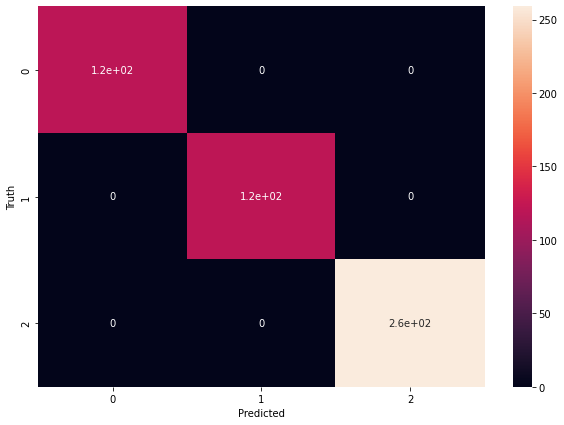

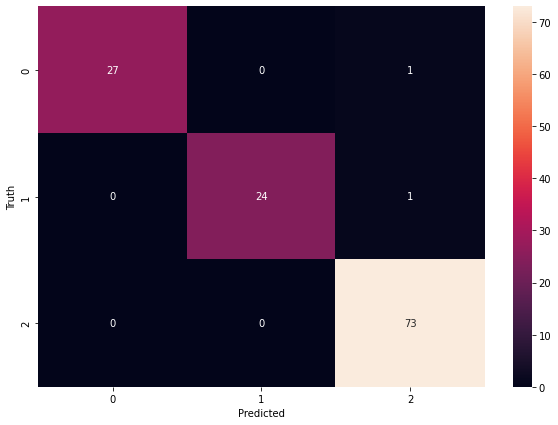

In [ ]:
Logistic_Regression(X2,Y2, c=1)

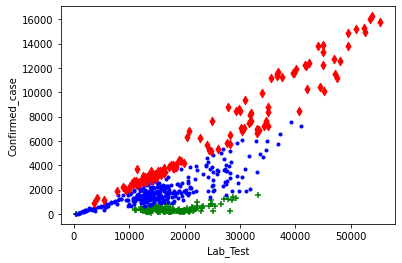

In [ ]:
low = df3[df3.Risk == 1]
Medium = df3[df3.Risk == 2]
High = df3[df3.Risk == 0]


plt.xlabel('Lab_Test')
plt.ylabel('Confirmed_case')
plt.scatter(low['Lab_Test'], low['Confirmed_case'], color='green', marker='+')
plt.scatter(Medium['Lab_Test'], Medium['Confirmed_case'], color='blue', marker='.')
plt.scatter(High['Lab_Test'], High['Confirmed_case'], color='red', marker='d')

------------------------SVM------------------------------------------------
For Train Dataset: 
Confusion Matrix: 
[[120   0   0]
 [  0 120   1]
 [  5   2 252]]
Accuracy Score:   0.984
Precision Score:  [0.96       0.98360656 0.99604743]
Recall Score:     [1.         0.99173554 0.97297297]

For Test Dataset: 
Confusion Matrix: 
[[28  0  0]
 [ 0 24  1]
 [ 1  1 71]]
Accuracy Score:   0.9761904761904762
Precision Score:  [0.96551724 0.96       0.98611111]
Recall Score:     [1.         0.96       0.97260274]



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto', kernel='linear'))])

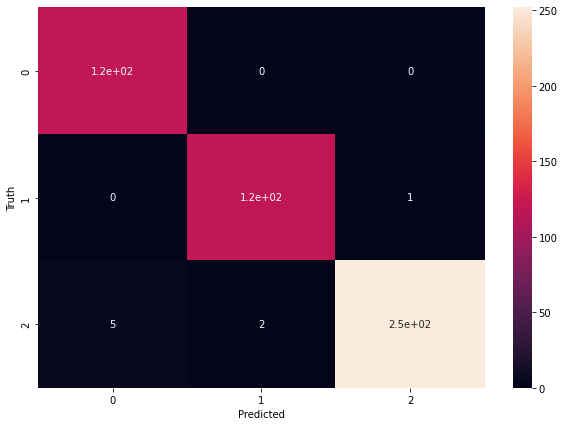

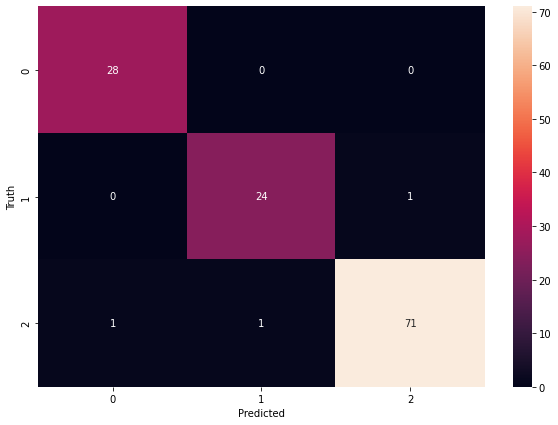

In [ ]:
SVM(X2,Y2)

# Regression

# Predict the Death Case

In [ ]:
OLS(X_Death_2,Y_Death_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4248.
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:18:18   Log-Likelihood:                -2537.2
No. Observations:                 626   AIC:                             5080.
Df Residuals:                     623   BIC:                             5094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.4858      1.424     -8.

Death Case = -12.4858 + 0.0010 * Lab Test + 0.0158 * Confirmed Case

--------------------Linear_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  12.254248450189777
MSE:  363.26841115001696
RMSE:  3.500606868842855
R-squared:  0.8721187854211984

For Test Dataset: 
MAE:  13.38245888191689
MSE:  453.8967275101678
RMSE:  3.6582043247906326
R-squared:  0.8693318657516167

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  9.218936835793585
MSE:  193.184225192634
RMSE:  3.036270217848468
R-squared:  0.9294478515947653

For Test Dataset: 
MAE:  10.170473541709104
MSE:  198.91558398230308
RMSE:  3.189117988050788
R-squared:  0.9387550372920697



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


LinearRegression()

<Figure size 432x288 with 0 Axes>

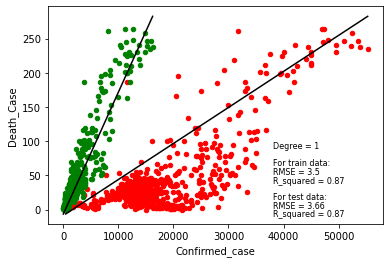

<Figure size 432x288 with 0 Axes>

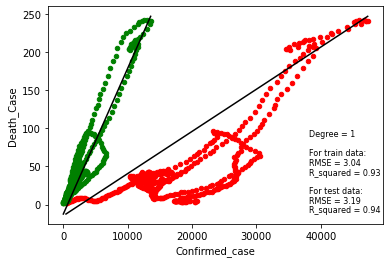

In [ ]:
print("--------------------Linear_Regression--------------------")
print()

print("The original dataset: ")
print()
Linear_Regression(data,X_Death,Y_Death)

print("------------------------------")

print("The Clean dataset: ")
print()
Linear_Regression(df2,X_Death_2,Y_Death_2)

--------------------Polynomial_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  10.115929621439008
MSE:  274.6710824457511
RMSE:  3.180554923506118
R-squared:  0.9033076629987205

For Test Dataset: 
MAE:  11.109273005685644
MSE:  335.1121718199885
RMSE:  3.3330576061156885
R-squared:  0.9035276537554225

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  5.6696836576191
MSE:  84.43490901351106
RMSE:  2.3811097533753247
R-squared:  0.969163816427746

For Test Dataset: 
MAE:  6.462033823157314
MSE:  104.46303771895225
RMSE:  2.54205307245095
R-squared:  0.9678364323127968

The Clean dataset: 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


For Train Dataset: 
MAE:  6.612947718289584
MSE:  83.09930002869642
RMSE:  2.571565227306044
R-squared:  0.9696515896049505

For Test Dataset: 
MAE:  8.18867497359475
MSE:  148.291307196576
RMSE:  2.8615860940385405
R-squared:  0.9543419605576376

The Clean dataset: 

For Train Dataset: 
MAE:  12.243744059734123
MSE:  223.83603487037152
RMSE:  3.499106180117163
R-squared:  0.9182536092951347

For Test Dataset: 
MAE:  12.853580032361688
MSE:  258.2812641238027
RMSE:  3.5851889814013553
R-squared:  0.9204766862769952



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('linearregression', LinearRegression())])

<Figure size 432x288 with 0 Axes>

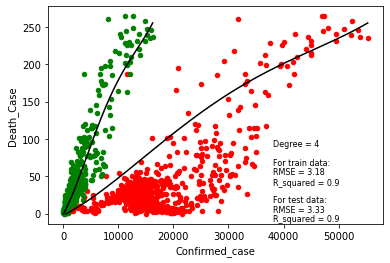

<Figure size 432x288 with 0 Axes>

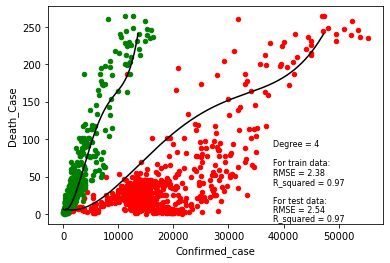

<Figure size 432x288 with 0 Axes>

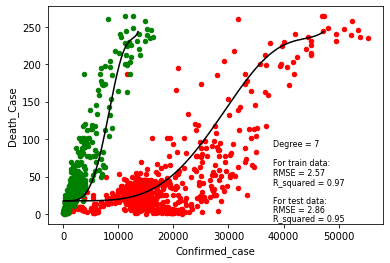

<Figure size 432x288 with 0 Axes>

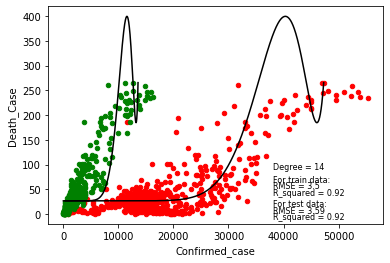

In [ ]:
print("--------------------Polynomial_Regression--------------------")
print()

print("The original dataset: ")
print()
Polynomial_Regression(data,X_Death,Y_Death, degree=4)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression(data,X_Death_2,Y_Death_2, degree=4)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression(data,X_Death_2,Y_Death_2, degree=7)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression(data,X_Death_2,Y_Death_2, degree=14)

--------------------Polynomial_Regression_L1--------------------

The original dataset: 

For Train Dataset: 
MAE:  10.97169628357383
MSE:  310.01761077971634
RMSE:  3.312355096237997
R-squared:  0.8908646406060444

For Test Dataset: 
MAE:  11.88957182313393
MSE:  397.57499745076404
RMSE:  3.4481258421255347
R-squared:  0.8855458081276135

------------------------------
The Clean dataset: 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+04, tolerance: 1.420e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.739e+04, tolerance: 1.369e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn

For Train Dataset: 
MAE:  6.678295840084525
MSE:  109.54642682539642
RMSE:  2.584239896001245
R-squared:  0.959992925121387

For Test Dataset: 
MAE:  6.657438741924344
MSE:  93.73501781915559
RMSE:  2.580201298721544
R-squared:  0.9711395278548306



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('lasso', Lasso(alpha=0.7))])

<Figure size 432x288 with 0 Axes>

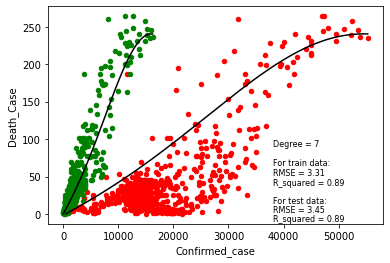

<Figure size 432x288 with 0 Axes>

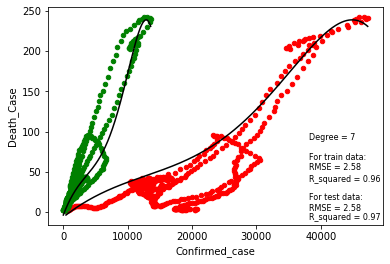

In [ ]:
print("--------------------Polynomial_Regression_L1--------------------")
print()

print("The original dataset: ")
print()
Polynomial_Regression_L1(data,X_Death,Y_Death, degree=7, alpha=0.7)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L1(df2,X_Death_2,Y_Death_2, degree=4, alpha=0.7)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L1(df2,X_Death_2,Y_Death_2, degree=7, alpha=0.7)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L1(df2,X_Death_2,Y_Death_2, degree=14, alpha=0.7)

--------------------Polynomial_Regression_L2--------------------

The original dataset: 

For Train Dataset: 
MAE:  9.069127213231186
MSE:  228.33660734056267
RMSE:  3.011499163744062
R-squared:  0.9196187673266875

For Test Dataset: 
MAE:  11.089754038581587
MSE:  290.42634766479233
RMSE:  3.330128231552291
R-squared:  0.916391842712546

------------------------------
The Clean dataset: 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.60855e-68): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


For Train Dataset: 
MAE:  7.089553026543291
MSE:  86.48046095377175
RMSE:  2.662621457613397
R-squared:  0.9684167674183563

For Test Dataset: 
MAE:  7.69176829639993
MSE:  113.56914833700348
RMSE:  2.7734037384412553
R-squared:  0.965032713297667



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('ridge', Ridge(alpha=0.5))])

<Figure size 432x288 with 0 Axes>

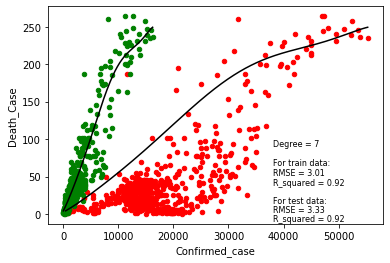

<Figure size 432x288 with 0 Axes>

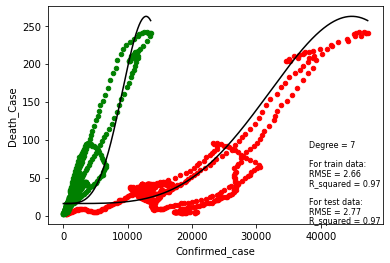

In [ ]:
print("--------------------Polynomial_Regression_L2--------------------")
print()

print("The original dataset: ")
print()
Polynomial_Regression_L2(data,X_Death,Y_Death, degree=7)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L2(df2,X_Death_2,Y_Death_2, degree=4)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L2(df2,X_Death_2,Y_Death_2, degree=7)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L2(df2,X_Death_2,Y_Death_2, degree=14)

--------------------Lasso_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  12.254252480735724
MSE:  363.2684111544684
RMSE:  3.500607444535266
R-squared:  0.8721187854196313

For Test Dataset: 
MAE:  13.382467446114775
MSE:  453.8970211180573
RMSE:  3.6582054953371297
R-squared:  0.8693317812275547

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  9.218943833785813
MSE:  193.18422519732553
RMSE:  3.0362713702476944
R-squared:  0.9294478515930519

For Test Dataset: 
MAE:  10.170490834856277
MSE:  198.91590231418093
RMSE:  3.1891206993239183
R-squared:  0.9387549392795178



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


Lasso(alpha=0.1)

<Figure size 432x288 with 0 Axes>

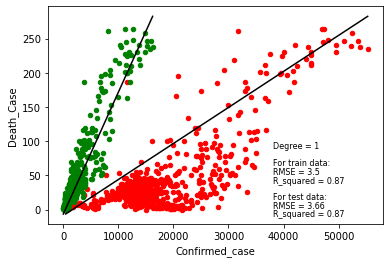

<Figure size 432x288 with 0 Axes>

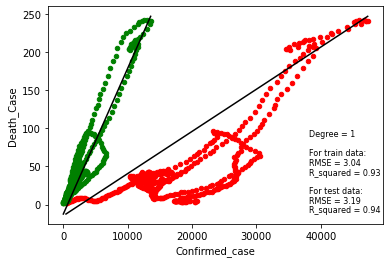

In [ ]:
print("--------------------Lasso_Regression--------------------")
print()

print("The original dataset: ")
print()
Lasso_Regression(data,X_Death,Y_Death, alpha=0.1)

print("------------------------------")

print("The Clean dataset alpha=0.1: ")
print()
Lasso_Regression(df2,X_Death_2,Y_Death_2, alpha=0.1)

print("------------------------------")

print("The Clean dataset alpha=1: ")
print()
Lasso_Regression(df2,X_Death_2,Y_Death_2, alpha=1)

print("------------------------------")

print("The Clean dataset alpha=10: ")
print()
Lasso_Regression(df2,X_Death_2,Y_Death_2, alpha=10)

--------------------Ridge_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  12.25424845068162
MSE:  363.26841115001696
RMSE:  3.5006068689131062
R-squared:  0.8721187854211984

For Test Dataset: 
MAE:  13.382458882892767
MSE:  453.8967275475459
RMSE:  3.658204324924015
R-squared:  0.8693318657408562

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  9.218936836619722
MSE:  193.184225192634
RMSE:  3.036270217984513
R-squared:  0.9294478515947653

For Test Dataset: 
MAE:  10.17047354385839
MSE:  198.9155840257668
RMSE:  3.1891179883877596
R-squared:  0.9387550372786875



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


Ridge(alpha=0.5)

<Figure size 432x288 with 0 Axes>

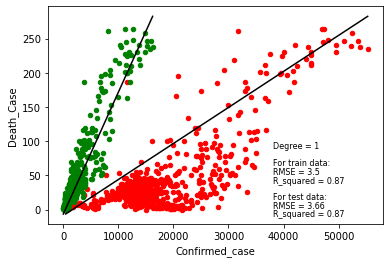

<Figure size 432x288 with 0 Axes>

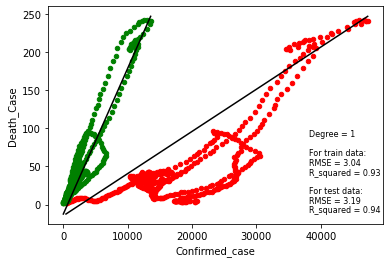

In [ ]:
print("--------------------Ridge_Regression--------------------")
print()

print("The original dataset: ")
print()
Ridge_Regression(data,X_Death,Y_Death)

print("------------------------------")

print("The Clean dataset: ")
print()
Ridge_Regression(df2,X_Death_2,Y_Death_2)

                Lab_Test  Confirmed_case  Death_Case  First_Dose  Second_Dose
Lab_Test        1.000000        0.802410    0.784627    0.252195     0.199990
Confirmed_case  0.802410        1.000000    0.931488   -0.166373    -0.193945
Death_Case      0.784627        0.931488    1.000000   -0.113791    -0.146283
First_Dose      0.252195       -0.166373   -0.113791    1.000000     0.988991
Second_Dose     0.199990       -0.193945   -0.146283    0.988991     1.000000



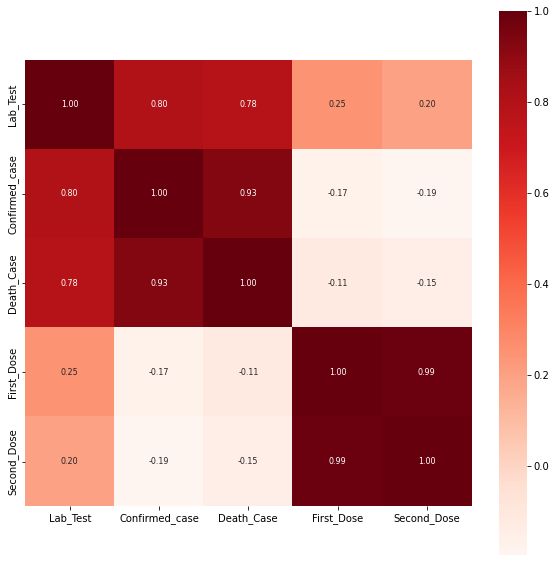

In [ ]:
corr = data.corr() 
print(corr)
print()

#corelation analysis
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8}, cmap='Reds')

--------------------ElasticNet_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  12.254258721132393
MSE:  363.2684111788733
RMSE:  3.5006083358656954
R-squared:  0.87211878541104

For Test Dataset: 
MAE:  13.382480725942393
MSE:  453.89747527066237
RMSE:  3.6582073104107145
R-squared:  0.8693316504857582

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  9.218954341029203
MSE:  193.18422522234502
RMSE:  3.03627310053447
R-squared:  0.9294478515839146

For Test Dataset: 
MAE:  10.170516908740838
MSE:  198.91638623732163
RMSE:  3.1891247872638724
R-squared:  0.9387547902823699



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


ElasticNet(alpha=0.5)

<Figure size 432x288 with 0 Axes>

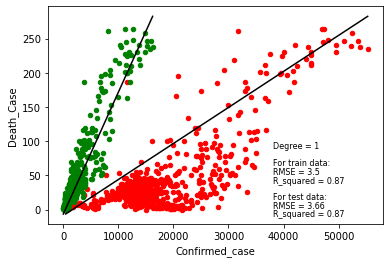

<Figure size 432x288 with 0 Axes>

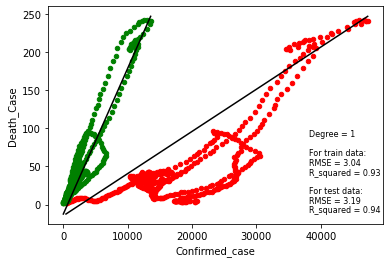

In [ ]:
print("--------------------ElasticNet_Regression--------------------")
print()

print("The original dataset: ")
print()
ElasticNet_Regression(data,X_Death,Y_Death, l1_ratio=0.5)

print("------------------------------")

print("The Clean dataset l1_ratio=0.3: ")
print()
ElasticNet_Regression(df2,X_Death_2,Y_Death_2, l1_ratio=0.3)

print("------------------------------")

print("The Clean dataset l1_ratio=0.5: ")
print()
ElasticNet_Regression(df2,X_Death_2,Y_Death_2, l1_ratio=0.5)

print("------------------------------")

print("The Clean dataset l1_ratio=0.7: ")
print()
ElasticNet_Regression(df2,X_Death_2,Y_Death_2, l1_ratio=0.7)

# Predict the Confirme Case

In [ ]:
OLS(X_Confirmed_2,Y_Confirmed_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     958.0
Date:                Fri, 21 Jan 2022   Prob (F-statistic):          1.17e-232
Time:                        15:18:23   Log-Likelihood:                -5317.0
No. Observations:                 626   AIC:                         1.064e+04
Df Residuals:                     622   BIC:                         1.066e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2217.2933    109.033    -20.336      

Confirme Case = -2217.2933 + 0.3118 * Lab Test - 0.0003 * First Dose + 0.0003 * Second Dose

--------------------Linear_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  1079.4549388912874
MSE:  1779756.3669579918
RMSE:  32.8550595630458
R-squared:  0.7859473065532862

For Test Dataset: 
MAE:  1001.0132133599342
MSE:  1477116.2930565127
RMSE:  31.638792855605825
R-squared:  0.8489079891313782

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  993.1645490702365
MSE:  1413470.6024329057
RMSE:  31.51451330847799
R-squared:  0.8154938480830959

For Test Dataset: 
MAE:  953.592358940988
MSE:  1339715.1585975746
RMSE:  30.880290784592493
R-squared:  0.8439881459735165



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


LinearRegression()

<Figure size 432x288 with 0 Axes>

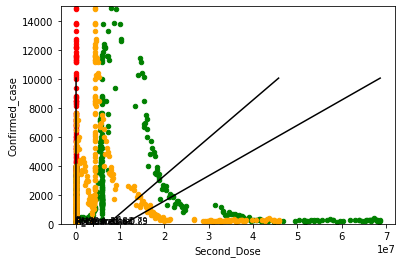

<Figure size 432x288 with 0 Axes>

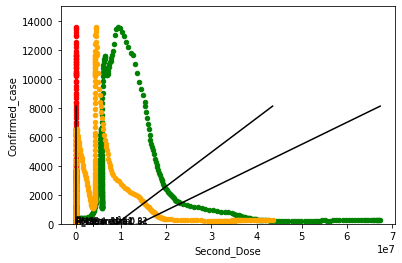

In [ ]:
print("--------------------Linear_Regression--------------------")
print()

print("The original dataset: ")
print()
Linear_Regression(data,X_Confirmed,Y_Confirmed, flg=1)

print("------------------------------")

print("The Clean dataset: ")
print()
Linear_Regression(df2,X_Confirmed_2,Y_Confirmed_2, flg=1)

--------------------Polynomial_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  1867.192662007766
MSE:  9804560.713279692
RMSE:  43.211024773867216
R-squared:  -0.17920220301079448

For Test Dataset: 
MAE:  2315.5393563484745
MSE:  19375053.262872808
RMSE:  48.120051499852686
R-squared:  -0.981845147829606

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  1544.5923921234673
MSE:  4922532.871214331
RMSE:  39.30130267718193
R-squared:  0.3574414662823966

For Test Dataset: 
MAE:  1727.9065409385705
MSE:  6230540.386603682
RMSE:  41.56809522865548
R-squared:  0.27444415996721117



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

<Figure size 432x288 with 0 Axes>

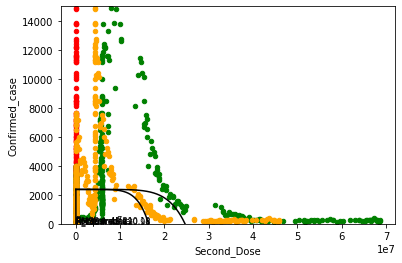

<Figure size 432x288 with 0 Axes>

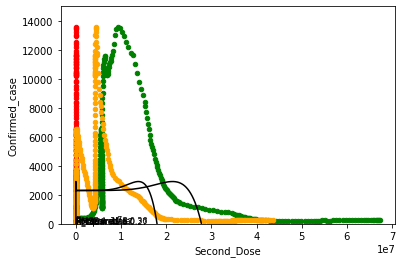

In [ ]:
print("--------------------Polynomial_Regression--------------------")
print()

print("The original dataset: ")
print()
Polynomial_Regression(data,X_Confirmed,Y_Confirmed, degree=7,flg=1)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression(df2,X_Confirmed_2,Y_Confirmed_2, degree=7,flg=1)

--------------------Polynomial_Regression_L1--------------------

The original dataset: 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+08, tolerance: 4.157e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.294e+07, tolerance: 3.830e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn

For Train Dataset: 
MAE:  628.4113583723483
MSE:  719088.3707174857
RMSE:  25.068134321731012
R-squared:  0.913514677943602

For Test Dataset: 
MAE:  598.8147777997639
MSE:  670332.9573602248
RMSE:  24.470692221507832
R-squared:  0.9314326468706878

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  433.68930924461085
MSE:  371770.6814904704
RMSE:  20.825208504228975
R-squared:  0.9514712384401446

For Test Dataset: 
MAE:  348.5913814890878
MSE:  261945.79423842442
RMSE:  18.67060206552236
R-squared:  0.9694960165589558



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('lasso', Lasso(alpha=0.5))])

<Figure size 432x288 with 0 Axes>

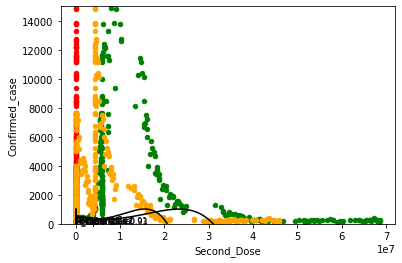

<Figure size 432x288 with 0 Axes>

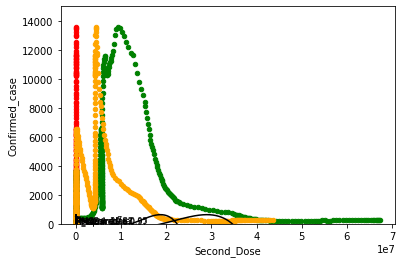

In [ ]:
print("--------------------Polynomial_Regression_L1--------------------")
print()

print("The original dataset: ")
print()
Polynomial_Regression_L1(data,X_Confirmed,Y_Confirmed, degree=7,flg=1)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L1(df2,X_Confirmed_2,Y_Confirmed_2, degree=7,flg=1)


--------------------Polynomial_Regression_L2--------------------

The original dataset: 

For Train Dataset: 
MAE:  2065.649028852904
MSE:  15793019.720158216
RMSE:  45.44941175475106
R-squared:  -0.8994388622612668

For Test Dataset: 
MAE:  2631.698759443592
MSE:  39204429.26055446
RMSE:  51.30008537462284
R-squared:  -3.0101622870036158

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  2601.380518641307
MSE:  17881302.35420254
RMSE:  51.003730438481725
R-squared:  -1.3341202023996068

For Test Dataset: 
MAE:  2841.9056634465965
MSE:  20620920.756370433
RMSE:  53.30952694825378
R-squared:  -1.4013373725667515



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('ridge', Ridge(alpha=0.5))])

<Figure size 432x288 with 0 Axes>

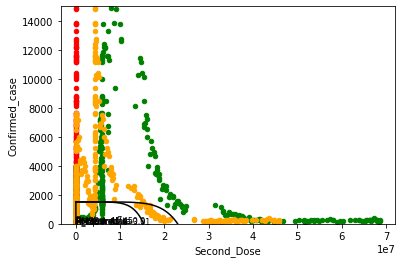

<Figure size 432x288 with 0 Axes>

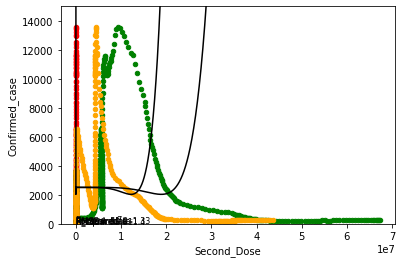

In [ ]:
print("--------------------Polynomial_Regression_L2--------------------")
print()

print("The original dataset: ")
print()
Polynomial_Regression_L2(data,X_Confirmed,Y_Confirmed, degree=7,flg=1)

print("------------------------------")

print("The Clean dataset: ")
print()
Polynomial_Regression_L2(df2,X_Confirmed_2,Y_Confirmed_2, degree=7,flg=1)


--------------------Lasso_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  1079.4549348074436
MSE:  1779756.3669579956
RMSE:  32.85505950089641
R-squared:  0.7859473065532857

For Test Dataset: 
MAE:  1001.0132149325627
MSE:  1477116.3137217844
RMSE:  31.638792880458677
R-squared:  0.8489079870175587

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  993.1645474458483
MSE:  1413470.6024329113
RMSE:  31.514513282705927
R-squared:  0.8154938480830951

For Test Dataset: 
MAE:  953.5923619691004
MSE:  1339715.1690694906
RMSE:  30.880290833622347
R-squared:  0.843988144754046



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.869e+08, tolerance: 4.157e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.424e+08, tolerance: 3.830e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451:

Lasso(alpha=0.5)

<Figure size 432x288 with 0 Axes>

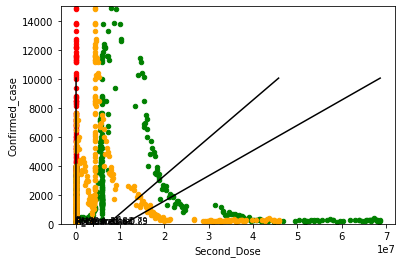

<Figure size 432x288 with 0 Axes>

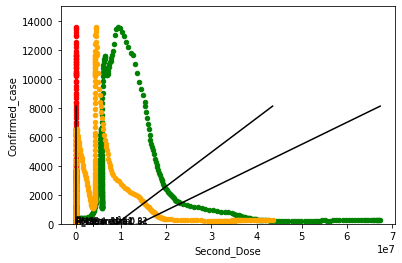

In [ ]:
print("--------------------Lasso_Regression--------------------")
print()

print("The original dataset: ")
print()
Lasso_Regression(data,X_Confirmed,Y_Confirmed,flg=1)

print("------------------------------")

print("The Clean dataset: ")
print()
Lasso_Regression(df2,X_Confirmed_2,Y_Confirmed_2,flg=1)

--------------------Ridge_Regression--------------------

The original dataset: 

For Train Dataset: 
MAE:  1079.454938888908
MSE:  1779756.3669579918
RMSE:  32.85505956300959
R-squared:  0.7859473065532862

For Test Dataset: 
MAE:  1001.0132133607301
MSE:  1477116.293068143
RMSE:  31.6387928556184
R-squared:  0.8489079891301886

------------------------------
The Clean dataset: 

For Train Dataset: 
MAE:  993.1645490696131
MSE:  1413470.6024329057
RMSE:  31.514513308468104
R-squared:  0.8154938480830959

For Test Dataset: 
MAE:  953.5923589419975
MSE:  1339715.1586009702
RMSE:  30.88029078460884
R-squared:  0.843988145973121



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


Ridge(alpha=0.5)

<Figure size 432x288 with 0 Axes>

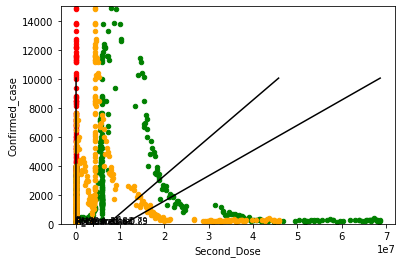

<Figure size 432x288 with 0 Axes>

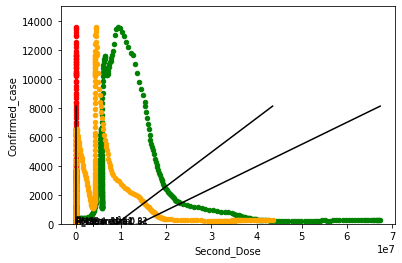

In [ ]:
print("--------------------Ridge_Regression--------------------")
print()

print("The original dataset: ")
print()
Ridge_Regression(data,X_Confirmed,Y_Confirmed,flg=1)

print("------------------------------")

print("The Clean dataset: ")
print()
Ridge_Regression(df2,X_Confirmed_2,Y_Confirmed_2,flg=1)

                Lab_Test  Confirmed_case  Death_Case  First_Dose  Second_Dose
Lab_Test        1.000000        0.802410    0.784627    0.252195     0.199990
Confirmed_case  0.802410        1.000000    0.931488   -0.166373    -0.193945
Death_Case      0.784627        0.931488    1.000000   -0.113791    -0.146283
First_Dose      0.252195       -0.166373   -0.113791    1.000000     0.988991
Second_Dose     0.199990       -0.193945   -0.146283    0.988991     1.000000



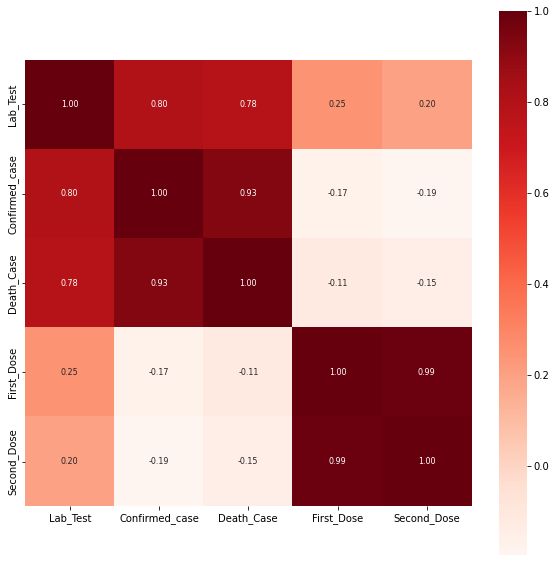

In [ ]:
corr = data.corr() 
print(corr)
print()

#corelation analysis
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8}, cmap='Reds')


# Time Series Analysis

In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2

In [ ]:
df = data.copy()
print(df.isna().sum())

Lab_Test          0
Confirmed_case    0
Death_Case        0
First_Dose        0
Second_Dose       0
dtype: int64


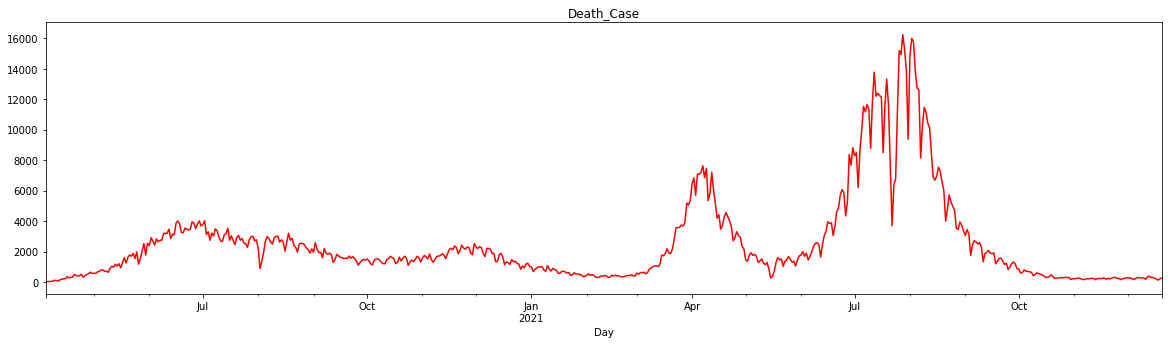

In [ ]:
df.Confirmed_case.plot(figsize=(20,5), title='Death_Case', color = "red")

In [ ]:
df_freq = df.asfreq('d')
df_freq_2 = df_freq.drop(columns = ['Lab_Test','Death_Case', 'First_Dose', 'Second_Dose'])
df_freq_2.head(10)

,Confirmed_case
Day,
2020-04-04,9
2020-04-05,18
2020-04-06,35
2020-04-07,41
2020-04-08,54
2020-04-09,112
2020-04-10,94
2020-04-11,58
2020-04-12,139


In [ ]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=14, min_periods=1).mean()
    rolstd = timeseries.rolling(window=14, min_periods=1).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Rolling Std')
    plt.show()
    
    # perform Dickey-fuller test
    print("Results of Dickey-fuller test: ")

    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test_statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [ ]:
print(df_freq_2.iloc[:,0])

Day
2020-04-04      9
2020-04-05     18
2020-04-06     35
2020-04-07     41
2020-04-08     54
             ... 
2021-12-16    257
2021-12-17    191
2021-12-18    122
2021-12-19    211
2021-12-20    260
Freq: D, Name: Confirmed_case, Length: 626, dtype: int64


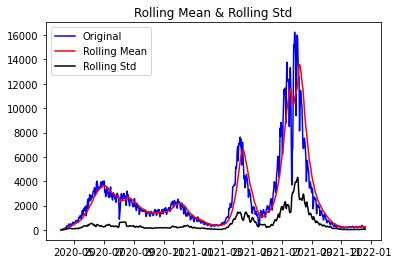

Results of Dickey-fuller test: 
Test_statistic                  -2.662739
p-value                          0.080711
#Lags Used                      17.000000
Number of Observations Used    608.000000
Critical Value (1%)             -3.441151
Critical Value (5%)             -2.866305
Critical Value (10%)            -2.569308
dtype: float64


In [ ]:
test_stationarity(df_freq_2.iloc[:,0])

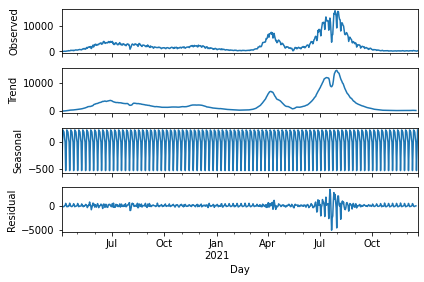

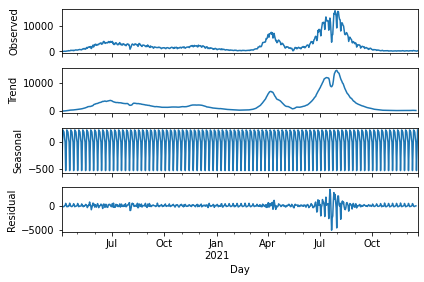

In [ ]:
# Seasonality

s_dec_additive = seasonal_decompose(df_freq_2, model = 'additive')
s_dec_additive.plot()

# there is no seasonality

Text(0.5, 1.0, 'ACF Plot')

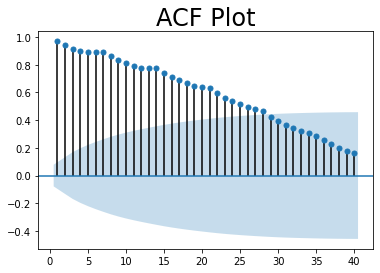

In [ ]:
# ACF (Direct + Indirect)

sgt.plot_acf(df_freq_2, lags=40, zero = False)
plt.title('ACF Plot', size= 24)

Text(0.5, 1.0, 'PACF Plot')

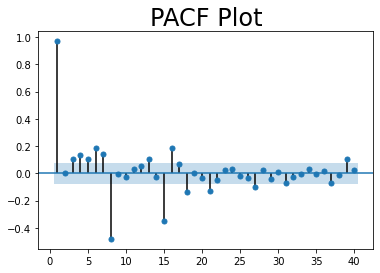

In [ ]:
# PACF (Direct)

sgt.plot_pacf(df_freq_2, lags=40, zero = False, method=('ols'))
plt.title('PACF Plot', size= 24)

Plotting ARIMA Model


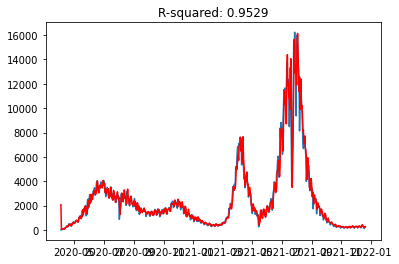

In [ ]:
# ARIMA model
model = ARIMA(df_freq_2, order=(5,0,5))
result_ARIMA = model.fit(disp=-1)
plt.plot(df_freq_2)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title('R-squared: %.4f'% metrics.r2_score(df_freq_2.Confirmed_case, result_ARIMA.fittedvalues))
print('Plotting ARIMA Model')

In [ ]:
predict_ARIMA = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(predict_ARIMA.tail())

Day
2021-12-16    311.801585
2021-12-17    249.802703
2021-12-18    203.227316
2021-12-19    219.665421
2021-12-20    271.861963
Freq: D, dtype: float64


In [ ]:
df_freq_2.tail()

,Confirmed_case
Day,
2021-12-16,257
2021-12-17,191
2021-12-18,122
2021-12-19,211
2021-12-20,260


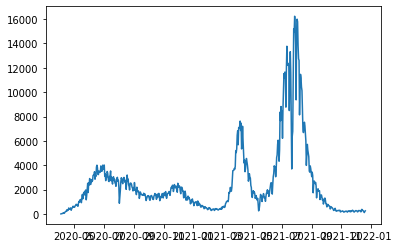

In [ ]:
plt.plot(df_freq_2.Confirmed_case)

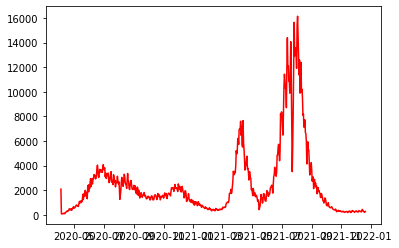

In [ ]:
plt.plot(predict_ARIMA,color='red')

In [ ]:
df_freq_2.shape

(626, 1)

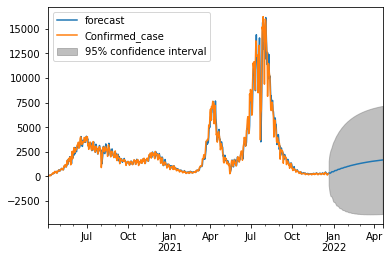

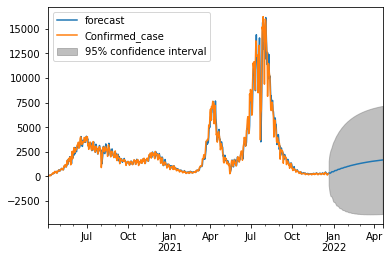

In [ ]:
result_ARIMA.plot_predict(1,626+120)
# result_ARIMA.forecast(steps=120)